In [35]:
# 1. Importation des bibliothèques
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Inputs & Outputs data
X = np.array([[0,0],[0,1],[1,0],[1,1]]) #Inputs
Y = np.array([[0],[1],[1],[1]]) #Outputs

# Créer un DataFrame pour un affichage propre
data = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
    'y (OR)': Y[:,0]
})

print(data)


   x1  x2  y (OR)
0   0   0       0
1   0   1       1
2   1   0       1
3   1   1       1


In [22]:
# 3. Construction du modèle
model = Sequential()  # Un modèle séquentiel : empilement de couches
model.add(Dense(1, input_dim=2, activation='sigmoid'))  # 1 neurone, 2 entrées

In [23]:
# 4. Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [27]:

# 5. Entraînement du modèle
model.fit(X, Y, epochs=2500, verbose=0)  # epochs = nombre de fois que le modèle voit tout X

In [37]:
# Sauvegarder le modèle complet
model.save('train_OR.h5')
print("Modèle sauvegardé avec succès sous 'train_OR.h5'")


Modèle sauvegardé avec succès sous 'train_OR.h5'


In [29]:
# 6. Évaluation du modèle
predictions = model.predict(X)
print("Prédictions :")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prédictions :
[[0.46007448]
 [0.8848419 ]
 [0.8106559 ]
 [0.97475165]]


In [30]:

# 7. Arrondir les prédictions pour obtenir 0 ou 1
print("Prédictions arrondies :")
print(np.round(predictions))

Prédictions arrondies :
[[0.]
 [1.]
 [1.]
 [1.]]


In [34]:
# Bloc 8 : Affichage des poids
for layer in model.layers:
    weights, biases = layer.get_weights()
    print("Poids :", weights)
    print("Biais :", biases)

Poids : [[1.6143203]
 [2.1991453]]
Biais : [-0.16004282]


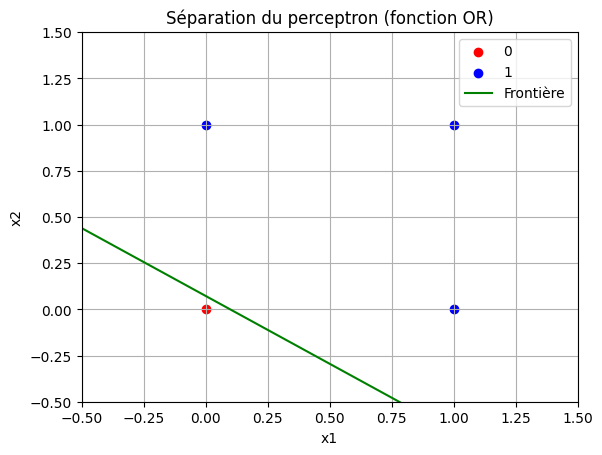

In [49]:

# Reprendre les poids et biais de ton modèle
weights, bias = model.layers[0].get_weights()
w1, w2 = weights[0][0], weights[1][0]
b = bias[0]

# Créer un nuage de points (les vraies données)
X_plot = np.array([[0,0], [0,1], [1,0], [1,1]])
Y_plot = np.array([0,1,1,1])

# Tracer les points
for i in range(len(X_plot)):
    if Y_plot[i] == 0:
        plt.scatter(X_plot[i][0], X_plot[i][1], color='red', label='0' if i==0 else "")
    else:
        plt.scatter(X_plot[i][0], X_plot[i][1], color='blue', label='1' if i==1 else "")

# Tracer la droite de décision
x_values = np.linspace(-0.5, 1.5, 100)
# Droite : w1*x1 + w2*x2 + b = 0  =>  x2 = (-w1*x1 - b) / w2
y_values = (-w1 * x_values - b) / w2
plt.plot(x_values, y_values, color='green', label='Frontière')

# Style du graphe
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Séparation du perceptron (fonction OR)')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.savefig('graphique_separation.png')
plt.show()

In [50]:
# Nouvelle approche : Arbre de décision
from sklearn.tree import DecisionTreeClassifier

# Données OR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,1])

# Modèle Arbre de Décision
tree_model = DecisionTreeClassifier()
tree_model.fit(X, Y)

# Prédictions
predictions_tree = tree_model.predict(X)
print(predictions_tree)


[0 1 1 1]
